In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df = pd.read_csv("/content/in-vehicle-coupon-recommendation.csv")

In [16]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [17]:
#CHECKING FOR MISSING VALUES
print(df.isnull().sum())

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64


In [18]:
# DROPPING CAR COLUMN AS IT AS ALMOST 99% OF DATA MISSING
df.drop(columns=['car'], inplace=True)

In [19]:
#APPLYING MODE IMPUTATION ON OTHER FEATURES CONTAINING MISSING VALUES
categorical_cols = ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

<ipython-input-19-192c51452981>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [20]:
print(df.isnull().sum())

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64


In [21]:
# NOW LET'S ENCODE THE CATEGORICAL FEATURES
from sklearn.preprocessing import LabelEncoder

# ONE HOT ENCODING NOMINAL FEATURES
df = pd.get_dummies(df, columns=['destination', 'weather', 'coupon', 'gender', 'education', 'occupation', 'income', 'passanger'], drop_first=True) # Added 'passanger' to the list of columns for one-hot encoding

# LABEL ENCODING FOR ORDINAL FEATURES
label_encoder = LabelEncoder()
ordinal_cols = ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']

for col in ordinal_cols:
    df[col] = label_encoder.fit_transform(df[col])

df.head()

,temperature,time,expiration,age,maritalStatus,has_children,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,...,income_$25000 - $37499,income_$37500 - $49999,income_$50000 - $62499,income_$62500 - $74999,income_$75000 - $87499,income_$87500 - $99999,income_Less than $12500,passanger_Friend(s),passanger_Kid(s),passanger_Partner
0,55,2PM,1d,21,Unmarried partner,1,4,4,0,1,...,False,True,False,False,False,False,False,False,False,False
1,80,10AM,2h,21,Unmarried partner,1,4,4,0,1,...,False,True,False,False,False,False,False,True,False,False
2,80,10AM,2h,21,Unmarried partner,1,4,4,0,1,...,False,True,False,False,False,False,False,True,False,False
3,80,2PM,2h,21,Unmarried partner,1,4,4,0,1,...,False,True,False,False,False,False,False,True,False,False
4,80,2PM,1d,21,Unmarried partner,1,4,4,0,1,...,False,True,False,False,False,False,False,True,False,False


In [22]:
df = pd.get_dummies(df, drop_first=True)

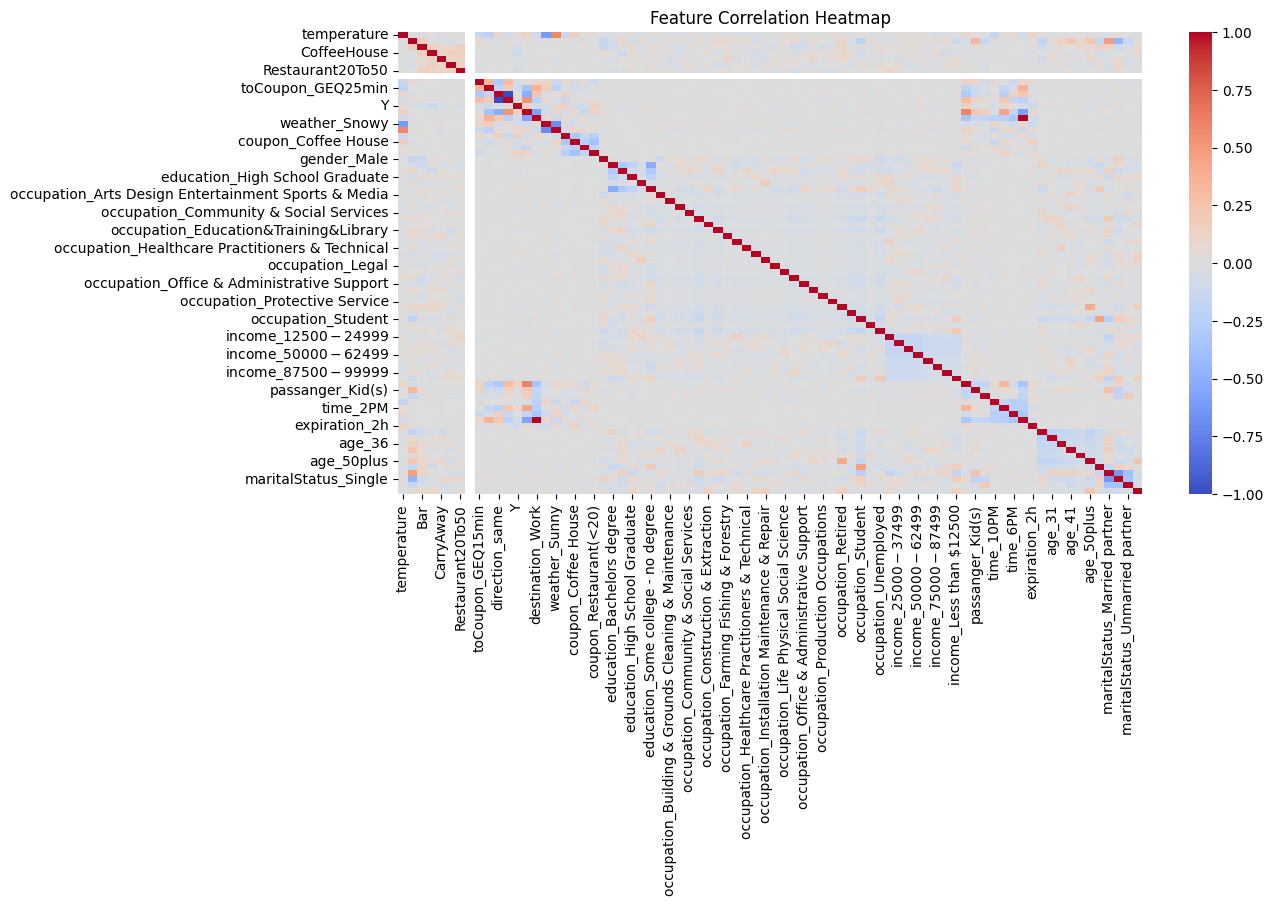

In [23]:
#TO SELECT IMPORTANT FEATURES AND REMOVE OTHERS, CHECKING CORRELATION BETWEEN NUMERICAL FEATURES
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=False, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

In [24]:
# SETTING CORRELATION THRESHOLD
corr_threshold = 0.85
corr_matrix = df.corr()

# FEATURES THAT ARE HIGHLY CORRELATED WITH EACH OTHER
high_corr_features = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > corr_threshold:
            colname = corr_matrix.columns[i]
            high_corr_features.add(colname)

print("Highly correlated features to drop:", high_corr_features)


Highly correlated features to drop: {'time_7AM', 'direction_opp'}


In [25]:
# DROPPING COLS THAT ARE LESS CORRELATED TO TARGET COLS
target_corr = df.corr()["Y"].drop("Y")

# Set a low-correlation threshold (e.g., 0.05)
low_corr_features = target_corr[abs(target_corr) < 0.05].index.tolist()

print("Low-correlation features to drop:", low_corr_features)

Low-correlation features to drop: ['has_children', 'CarryAway', 'RestaurantLessThan20', 'direction_same', 'direction_opp', 'gender_Male', 'education_Bachelors degree', 'education_Graduate degree (Masters or Doctorate)', 'education_High School Graduate', 'education_Some High School', 'education_Some college - no degree', 'occupation_Arts Design Entertainment Sports & Media', 'occupation_Building & Grounds Cleaning & Maintenance', 'occupation_Business & Financial', 'occupation_Community & Social Services', 'occupation_Computer & Mathematical', 'occupation_Construction & Extraction', 'occupation_Education&Training&Library', 'occupation_Farming Fishing & Forestry', 'occupation_Food Preparation & Serving Related', 'occupation_Healthcare Practitioners & Technical', 'occupation_Healthcare Support', 'occupation_Installation Maintenance & Repair', 'occupation_Legal', 'occupation_Life Physical Social Science', 'occupation_Management', 'occupation_Office & Administrative Support', 'occupation_Per

In [26]:
# REMOVE ABOVE SELECTED FEATURES
df_cleaned = df.drop(columns=high_corr_features.union(low_corr_features))

print("Final feature set after removing unimportant features:", df_cleaned.columns)


Final feature set after removing unimportant features: Index(['temperature', 'Bar', 'CoffeeHouse', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'Y',
       'destination_No Urgent Place', 'destination_Work', 'weather_Snowy',
       'weather_Sunny', 'coupon_Carry out & Take away', 'coupon_Coffee House',
       'coupon_Restaurant(20-50)', 'coupon_Restaurant(<20)',
       'passanger_Friend(s)', 'time_10PM', 'time_2PM', 'expiration_2h',
       'maritalStatus_Single'],
      dtype='object')


In [27]:
df_cleaned.to_csv("cleaned_in_vehicle_coupon_data.csv", index=False)

print("Dataset saved successfully!")

Dataset saved successfully!


In [30]:
df_cleaned.head()

,temperature,Bar,CoffeeHouse,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,Y,destination_No Urgent Place,destination_Work,...,weather_Sunny,coupon_Carry out & Take away,coupon_Coffee House,coupon_Restaurant(20-50),coupon_Restaurant(<20),passanger_Friend(s),time_10PM,time_2PM,expiration_2h,maritalStatus_Single
0,55,4,4,0,1,0,0,1,True,False,...,True,False,False,False,True,False,False,True,False,False
1,80,4,4,0,1,0,0,0,True,False,...,True,False,True,False,False,True,False,False,True,False
2,80,4,4,0,1,1,0,1,True,False,...,True,True,False,False,False,True,False,False,True,False
3,80,4,4,0,1,1,0,0,True,False,...,True,False,True,False,False,True,False,True,True,False
4,80,4,4,0,1,1,0,0,True,False,...,True,False,True,False,False,True,False,True,False,False


In [31]:
# NOW LETS TRAIN MULTIPLE CLASSIFICATION MODELS TO IDENTIFY BEST WORKING ONE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

X = df_cleaned.drop(columns=['Y'])
y = df_cleaned['Y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# AS FEATURE NAMES CONTAIN INVALID CHARACTERS
X_train.columns = X_train.columns.astype(str)
X_train.columns = X_train.columns.str.replace('[\[\]\<]', '', regex=True)
X_test.columns = X_test.columns.astype(str)
X_test.columns = X_test.columns.str.replace('[\[\]\<]', '', regex=True)
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_clf.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:03:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [34]:
# EVALUATING MODEL PERFORMANCE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# FUNCTION TO REUSE
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    print(f"{model_name} Performance:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1-score:", f1_score(y_test, y_pred))
    print("-" * 50)

evaluate_model(log_reg, X_test, y_test, "Logistic Regression")
evaluate_model(rf_clf, X_test, y_test, "Random Forest")
evaluate_model(xgb_clf, X_test, y_test, "XGBoost")


Logistic Regression Performance:
Accuracy: 0.6708711076074103
Precision: 0.6830357142857143
Recall: 0.7601135557132718
F1-score: 0.7195162915686933
--------------------------------------------------
Random Forest Performance:
Accuracy: 0.658651951123374
Precision: 0.6811207471647766
Recall: 0.7246273953158269
F1-score: 0.702200825309491
--------------------------------------------------
XGBoost Performance:
Accuracy: 0.7114702404414663
Precision: 0.722550953320184
Recall: 0.7799858055358411
F1-score: 0.7501706484641638
--------------------------------------------------


In [33]:
# SO THE BEST WORKING ONE IS XGBOOST